In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow import keras
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

In [ ]:
path = 'cleaned_batik/'
temp_img_array = cv2.imread(path + 'batik-bali/1.jpg')
print(temp_img_array)

[[[60 10 10]
  [57 13 12]
  [54 19 16]
  ...
  [54 30 42]
  [53 28 42]
  [62 37 51]]

 [[63 14 12]
  [60 17 14]
  [56 23 20]
  ...
  [66 42 54]
  [65 40 54]
  [65 39 53]]

 [[64 18 10]
  [59 17 10]
  [55 23 18]
  ...
  [56 34 46]
  [62 36 50]
  [62 33 48]]

 ...

 [[24 10 11]
  [27 11 12]
  [27  9 10]
  ...
  [59  8 12]
  [72 10 16]
  [92 24 31]]

 [[21  8 10]
  [24 10 12]
  [24  7 10]
  ...
  [55  8 11]
  [63  6  9]
  [78 17 21]]

 [[19  8 10]
  [23 10 12]
  [24  7 11]
  ...
  [53 10 13]
  [62  7 10]
  [79 20 24]]]


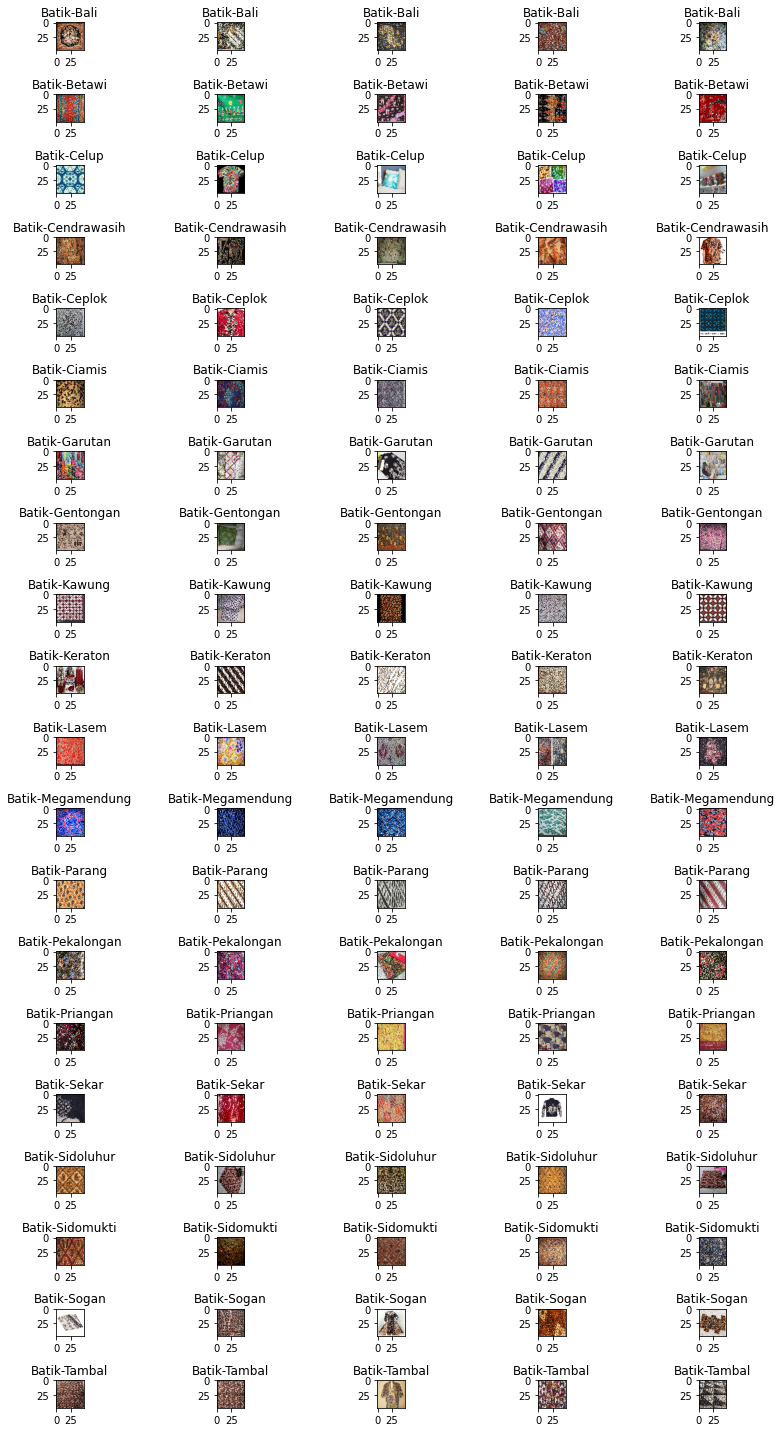

In [ ]:
pic_size = 48

plt.figure(0, figsize=(12,20))
temp = 0
img = []

for batik in os.listdir(path):
    for i in range(1, 6):
        temp = temp + 1
        plt.subplot(20, 5, temp)
        img = load_img(path + batik + "/" + os.listdir(path + batik)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap='gray')
        plt.title(batik.title())

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

for batik in os.listdir(path):
  for filename in os.listdir(path + batik + '/'):
      try:
        img = Image.open(path + batik + '/' + filename)
        img.verify()
      except (IOError, SyntaxError) as e:
        print('Bad file:', filename)
        print('Folder:', batik)
        os.remove(path + batik + '/' + filename)

In [ ]:
print('Total Dataset')
total_images = 0

for batik in os.listdir(path):
    # print(batik + ": " + str(len(os.listdir(path + batik))) + ' images')
    for image in os.listdir(path + batik + "/"):
      try:
          img = cv2.imread(path + batik + "/" + image)
          total_images += 1
      except:
          pass
    # total_images += len(os.listdir(path + batik))

print('\nTotal images: ' + str(total_images) + ' images')

Total Dataset

Total images: 968 images


In [ ]:
img_arr = []
img_label = []
label_dict = {}

i = 0
num = 0

for batik in os.listdir(path):
      label_dict[num] = batik
      for image in os.listdir(path + batik + "/"):
          try:
            img = cv2.imread(path + batik + "/" + image)
          except:
            pass

          try:
            img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
          except:
            continue
          

          img_arr.append(img)
          img_label.append(num)
          i += 1
      print('All images in ' + batik + ' has been input to numpy array')
      num += 1

img_arr = np.array(img_arr)
img_label = np.array(img_label)

print()
print(label_dict)
img_arr.shape, img_label.shape

All images in batik-bali has been input to numpy array
All images in batik-betawi has been input to numpy array
All images in batik-celup has been input to numpy array
All images in batik-cendrawasih has been input to numpy array
All images in batik-ceplok has been input to numpy array
All images in batik-ciamis has been input to numpy array
All images in batik-garutan has been input to numpy array
All images in batik-gentongan has been input to numpy array
All images in batik-kawung has been input to numpy array
All images in batik-keraton has been input to numpy array
All images in batik-lasem has been input to numpy array
All images in batik-megamendung has been input to numpy array
All images in batik-parang has been input to numpy array
All images in batik-pekalongan has been input to numpy array
All images in batik-priangan has been input to numpy array
All images in batik-sekar has been input to numpy array
All images in batik-sidoluhur has been input to numpy array
All images i

((964, 224, 224, 3), (964,))

In [ ]:
img_label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4

In [ ]:
img_arr

array([[[[ 52,  19,  15],
         [ 53,  19,  18],
         [ 73,  37,  25],
         ...,
         [ 63,  41,  60],
         [ 64,  47,  58],
         [ 60,  38,  51]],

        [[ 61,  23,  12],
         [ 52,  21,  14],
         [ 63,  28,  23],
         ...,
         [ 59,  43,  56],
         [ 66,  44,  54],
         [ 61,  44,  55]],

        [[ 98,  53,   8],
         [ 71,  37,   8],
         [ 53,  26,  12],
         ...,
         [ 69,  50,  61],
         [ 71,  48,  56],
         [ 58,  40,  50]],

        ...,

        [[ 46,  20,  13],
         [ 42,  16,  14],
         [ 49,  20,  13],
         ...,
         [ 68,  28,  16],
         [ 39,  12,  16],
         [ 31,  11,  16]],

        [[ 39,  20,  13],
         [ 32,  12,  13],
         [ 37,  17,  11],
         ...,
         [ 67,  28,  18],
         [ 48,  14,  16],
         [ 47,  10,  16]],

        [[ 26,   7,   9],
         [ 33,  10,  14],
         [ 43,  15,  13],
         ...,
         [ 60,  27,  26],
        

In [ ]:
img_label = np_utils.to_categorical(img_label)
img_label.shape

(964, 20)

In [ ]:
img_label

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
img_arr = img_arr / 255.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_arr, img_label,
                                                    shuffle=True, stratify=img_label,
                                                    test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((771, 224, 224, 3), (193, 224, 224, 3), (771, 20), (193, 20))

In [ ]:
num_classes = 20
featurizer = MobileNet(include_top=False, weights='imagenet', input_shape=(224,224,3), classes=num_classes, dropout = 0.5)
featurizer.trainable = False

x = Flatten()(featurizer.output)
x = Dense(512, kernel_regularizer=regularizers.l2(0.0001), activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

model = Model(inputs = featurizer.input, outputs = predictions)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [ ]:
train_datagenerator = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)
train_datagenerator.fit(X_train)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
  optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
)

In [ ]:
checkpoint = ModelCheckpoint("model_weights3.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

hist = model.fit(train_datagenerator.flow(X_train, y_train, batch_size=25),
                                steps_per_epoch=len(X_train) / 25,
                                validation_data = (X_test, y_test),
                                epochs=10,
                                use_multiprocessing=False,
                                callbacks = callbacks_list,
                                )

Epoch 1/10
31/30 [==============================] - ETA: 0s - loss: 3.1184 - accuracy: 0.1907
Epoch 1: val_accuracy improved from -inf to 0.29016, saving model to model_weights3.h5
30/30 [==============================] - 45s 1s/step - loss: 3.1184 - accuracy: 0.1907 - val_loss: 3.1742 - val_accuracy: 0.2902
Epoch 2/10
31/30 [==============================] - ETA: 0s - loss: 2.3934 - accuracy: 0.3541
Epoch 2: val_accuracy improved from 0.29016 to 0.35751, saving model to model_weights3.h5
30/30 [==============================] - 40s 1s/step - loss: 2.3934 - accuracy: 0.3541 - val_loss: 2.5372 - val_accuracy: 0.3575
Epoch 3/10
31/30 [==============================] - ETA: 0s - loss: 2.0217 - accuracy: 0.4682
Epoch 3: val_accuracy did not improve from 0.35751
30/30 [==============================] - 39s 1s/step - loss: 2.0217 - accuracy: 0.4682 - val_loss: 2.4158 - val_accuracy: 0.3368
Epoch 4/10
31/30 [==============================] - ETA: 0s - loss: 1.7923 - accuracy: 0.5240
Epoch 4: 

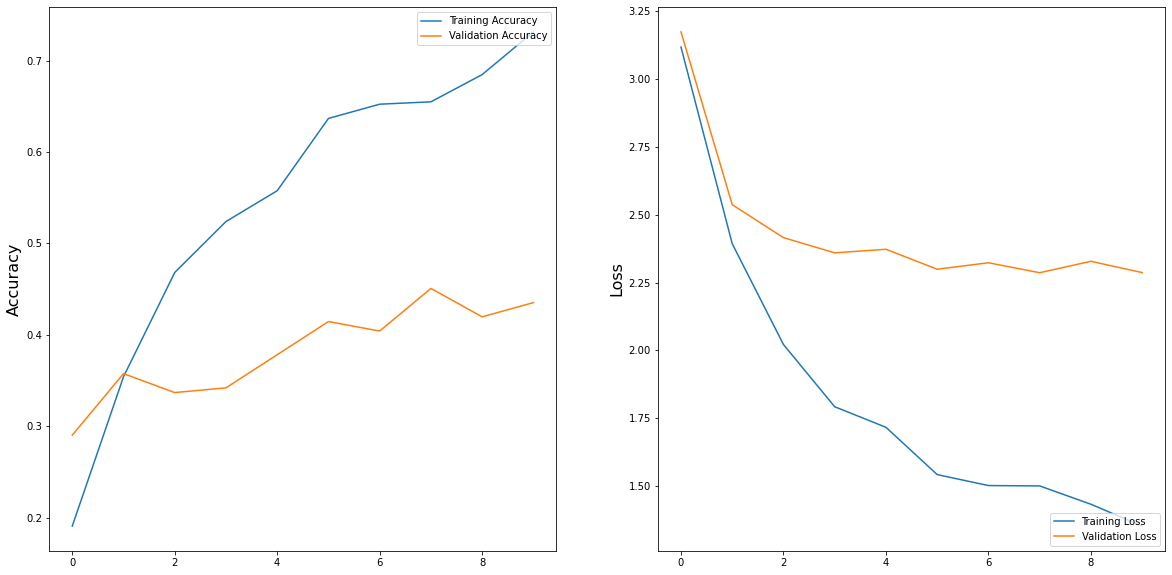

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend(loc='lower right')


plt.show()